Aim: Conducting and RFM analysis to find segments differenciated by recency of purchase, frequency and monetary value. 

In [31]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv('online12M.csv')
df.head()

,No,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,25/10/2011,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,20/11/2011,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,14/07/2011,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,23/11/2011,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,25/05/2011,5.95,17663,United Kingdom


In [33]:
# Create a new column to find total spending per invoice
df['TotalSum'] = df['UnitPrice'] * df['Quantity']

In [34]:
df.head()

,No,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,25/10/2011,2.10,14286,United Kingdom,12.60
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,20/11/2011,1.45,16360,United Kingdom,1.45
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,14/07/2011,3.75,13933,United Kingdom,22.50
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,23/11/2011,2.10,17290,United Kingdom,2.10
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,25/05/2011,5.95,17663,United Kingdom,17.85


In [35]:
# Convert invoixe date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y')

# create a hypothetical snapshot_day data as if we're doing analysis recently
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer 
datamart = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


In [36]:
# Create labels for Recency, Frequency and Monetary Value
r_labels = range(3, 0, -1) 
f_labels = range(1, 4)
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747    9
12748    9
12749    9
12820    9
12822    6
Name: RFM_Score, dtype: int64


In [37]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         153.4       4.4          86.9  1627
Middle       50.8      18.0         332.1  1450
Top          10.7      61.5        1285.3   566


In [39]:
# Get the key statistics of the dataset
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3643.00000,3643.000000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387,5.983256
std,94.44651,43.754468,1347.443451,2.012453
min,1.00000,1.000000,0.650000,3.000000
25%,19.00000,4.000000,58.705000,4.000000
50%,51.00000,9.000000,136.370000,6.000000
75%,139.00000,21.000000,334.350000,8.000000
max,365.00000,1497.000000,48060.350000,9.000000


C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

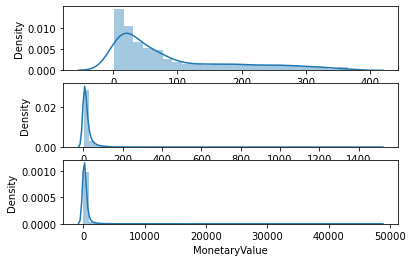

In [40]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])

# Show the plot
plt.show()

In [41]:
from scipy.stats import shapiro

# Assuming your DataFrame is named 'df' and you have columns 'Recency', 'Frequency', 'MonetaryValue'
variables = ['Recency', 'Frequency', 'MonetaryValue']

for variable in variables:
    stat, p_value = shapiro(datamart[variable])
    significance_level = 0.05
    
    if p_value > significance_level:
        print(f"{variable} follows a normal distribution (p-value: {p_value})")
    else:
        print(f"{variable} does not follow a normal distribution (p-value: {p_value})")


Recency does not follow a normal distribution (p-value: 0.0)
Frequency does not follow a normal distribution (p-value: 0.0)
MonetaryValue does not follow a normal distribution (p-value: 0.0)


In [42]:
# dropping certain columns that are not related to RFM analysis
columns_to_drop = ['RFM_Score', 'RFM_Level', 'R', 'F', 'M']
df = datamart.drop(columns=columns_to_drop)

In [43]:
# transfrom variables to log function to normalize distribution
for var in variables:
    df[var] = np.log(df[var])

C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

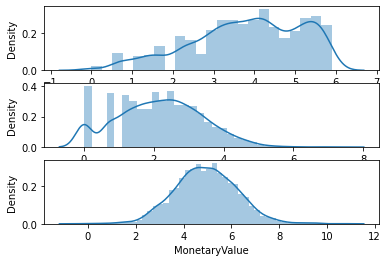

In [44]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])

# Show the plot
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(df)

# Scale and center the data
data_normalized = scaler.transform(df)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=df.index, columns=df.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

       Recency  Frequency  MonetaryValue
count  3643.00    3643.00        3643.00
mean     -0.00       0.00           0.00
std       1.00       1.00           1.00
min      -2.81      -1.79          -4.09
25%      -0.64      -0.65          -0.66
50%       0.09       0.02          -0.01
75%       0.83       0.72           0.67
max       1.55       4.25           4.46


In [51]:
sse = {}

for k in range(1,15):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = df.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

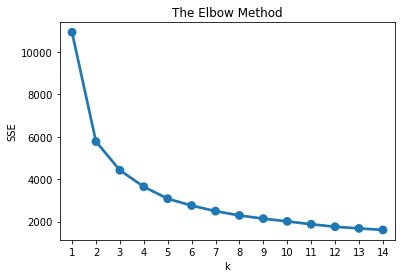

In [48]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [49]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfm_k3)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [50]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfm_k3.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           2.3       3.8           6.7   626
1           2.7       2.3           4.9   851
2           4.8       0.9           3.6  1056
3           4.6       2.4           5.3  1110